In [7]:
import json

import angorapy as ang
import angorapy.environments
import bokeh
import numpy as np
from bokeh.io import output_notebook, show, output_file, export_png

from angorapy.analysis.investigation import Investigator
from angorapy.common.const import PATH_TO_EXPERIMENTS
from angorapy.utilities.monitor import training_plots as plots
output_notebook()

from IPython.display import Image

agent = ang.agent.PPOAgent.from_agent_state(1662892673327919, from_iteration="best")
investigator = Investigator.from_agent(agent)

Loading BokehJS ...

Loading from iteration best.
Using [StateNormalizationTransformer, RewardNormalizationTransformer] for preprocessing.


/home/weidler/workspace/angorapy-agents/venv/lib/python3.8/site-packages/gym/envs/registration.py:619: UserWarning: WARN: Env check failed with the following message: Error while checking key=desired_goal: The observation returned by the `reset()` method does not match the given observation space
You can set `disable_env_checker=True` to disable this check.
  logger.warn(


An MPI Optimizer with 1 ranks has been created; the following ranks optimize: [0]
An MPI Optimizer with 1 ranks has been created; the following ranks optimize: [0]


/home/weidler/workspace/angorapy-agents/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/weidler/workspace/angorapy-agents/venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Loaded optimizer.


## Learning Curves & Statistics
First things first, let us see how training of this agent went. We can easily plot the reward over training cycles, as follows

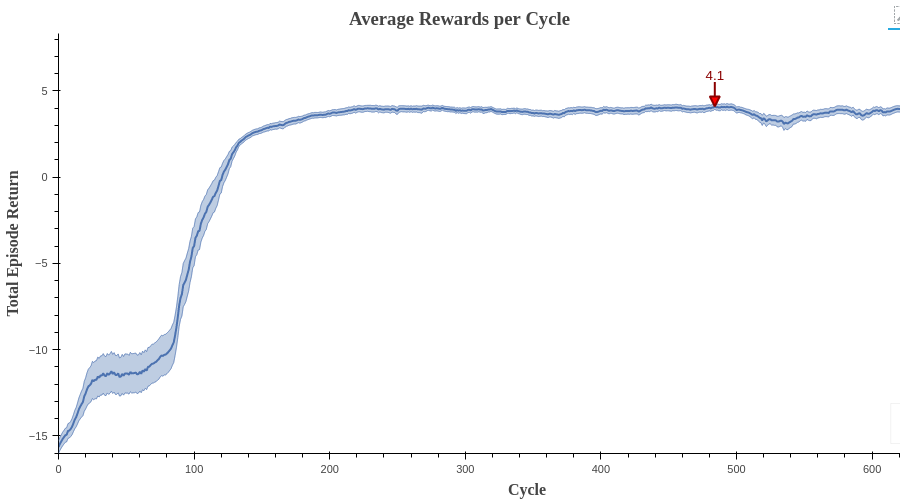

In [8]:
with open(f"{PATH_TO_EXPERIMENTS}/{agent.agent_id}/progress.json", "r") as f:
    progress_data = json.load(f)

reward_plot = plots.plot_reward_progress(progress_data["rewards"], [])
show(reward_plot)
# Image(filename=export_png(reward_plot, filename="reach_reward_curve.png"))   # for rendering on github

## Evaluation

The above plots already show how performance progressed throughout training. Note, however, that AngoraPy trains agents with stochastic policies and, during training, encourages exploration. Thus, the above performance at every cycle is not entirely representative of the agents true potential. To evaluate its real performance, let us run 10 episodes without random exploration.

In [9]:
stats_eval = agent.evaluate(10, act_confidently=False)[0]

In [10]:
print(np.mean(stats_eval.episode_rewards))

3.6156177399612277


## Rendering
Lastly, let us inspect qualitatively the behaviour of the agent, by rendering a few episode.

In [11]:
for i in range(10):
    investigator.render_episode(agent.env)

Setting up camera.
Camera setup finished.


SystemExit: 0

/home/weidler/workspace/angorapy-agents/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3386: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
